In [1]:
import logging;

logging.basicConfig(level=logging.ERROR)
logging.getLogger().setLevel(level=logging.ERROR)

import warnings
warnings.simplefilter("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from common.data_loader import *
from common.function import *

In [3]:
train_x, train_y = get_ucr_training_data()

In [4]:
test_x, test_y = get_ucr_test_data()

In [5]:
seq_len = train_x.shape[1]
seq_len

152

In [6]:
train_x = normalize(train_x)
test_x = normalize(test_x)

In [7]:
train_data = pd.DataFrame({
    "timestamp": np.array(range(seq_len)),
    "value": train_x.iloc[0]
})

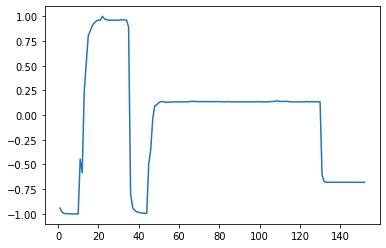

In [8]:
plt.plot(train_data.value)

In [9]:
from orion import Orion

pipeline='aer'

hyperparameters = {
    'mlstars.custom.timeseries_preprocessing.time_segments_aggregate#1': {
        "interval": 1
    },
    'orion.primitives.aer.AER#1': {
        'epochs': 5,
        'verbose': True
    }
}

orion = Orion(
    pipeline=pipeline,
    hyperparameters=hyperparameters
)

orion.fit(train_data)

Epoch 1/5
1/1 [==============================] - 1s 716ms/step - loss: 0.3748 - tf_op_layer_strided_slice_loss: 0.9196 - tf_op_layer_strided_slice_1_loss: 0.2347 - tf_op_layer_strided_slice_2_loss: 0.1100 - val_loss: 0.2645 - val_tf_op_layer_strided_slice_loss: 0.3251 - val_tf_op_layer_strided_slice_1_loss: 0.0932 - val_tf_op_layer_strided_slice_2_loss: 0.5464
Epoch 2/5
1/1 [==============================] - 0s 20ms/step - loss: 0.3574 - tf_op_layer_strided_slice_loss: 0.8646 - tf_op_layer_strided_slice_1_loss: 0.2308 - tf_op_layer_strided_slice_2_loss: 0.1035 - val_loss: 0.2553 - val_tf_op_layer_strided_slice_loss: 0.3130 - val_tf_op_layer_strided_slice_1_loss: 0.0923 - val_tf_op_layer_strided_slice_2_loss: 0.5235
Epoch 3/5
1/1 [==============================] - 0s 15ms/step - loss: 0.3446 - tf_op_layer_strided_slice_loss: 0.8147 - tf_op_layer_strided_slice_1_loss: 0.2324 - tf_op_layer_strided_slice_2_loss: 0.0990 - val_loss: 0.2471 - val_tf_op_layer_strided_slice_loss: 0.3008 - val_t

In [10]:
count = 0
result = pd.DataFrame(columns=['start','end','severity'])
for i in tqdm(range(10)):
    anomalies = orion.detect(pd.DataFrame({
        "timestamp": np.array(range(seq_len)),
        "value": test_x.iloc[i]
    }))
    count += len(anomalies)
    result = pd.concat([result, anomalies])
print("count:",count)
result

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  3.57it/s]

count: 0


,start,end,severity


In [11]:
# pipeline='tadgan'
# pipeline='arima'
# pipeline='lstm_dynamic_threshold'

In [12]:
df = pd.DataFrame({
        "timestamp": np.array(range(seq_len)),
        "value": test_x.iloc[i]
    })

In [13]:
from orion.analysis import analyze

hyperparameters = {
    'mlstars.custom.timeseries_preprocessing.time_segments_aggregate#1': {
        "interval": 1
    },
    'keras.Sequential.LSTMTimeSeriesRegressor#1': {
        'epochs': 5,
        'verbose': True
    }
}

pipeline='lstm_dynamic_threshold'

anomalies = analyze(pipeline, df, hyperparams=hyperparameters)
anomalies

ERROR:mlblocks.mlpipeline:Exception caught fitting MLBlock keras.Sequential.LSTMTimeSeriesRegressor#1
Traceback (most recent call last):
  File "c:\users\sewoo\appdata\local\programs\python\python36\lib\site-packages\mlblocks\mlpipeline.py", line 644, in _fit_block
    block.fit(**fit_args)
  File "c:\users\sewoo\appdata\local\programs\python\python36\lib\site-packages\mlblocks\mlblock.py", line 311, in fit
    getattr(self.instance, self.fit_method)(**fit_kwargs)
  File "c:\users\sewoo\appdata\local\programs\python\python36\lib\site-packages\mlstars\adapters\keras.py", line 104, in fit
    self._augment_hyperparameters(X, 'input', kwargs)
  File "c:\users\sewoo\appdata\local\programs\python\python36\lib\site-packages\mlstars\adapters\keras.py", line 90, in _augment_hyperparameters
    shape = np.asarray(X)[0].shape
IndexError: index 0 is out of bounds for axis 0 with size 0


IndexError: index 0 is out of bounds for axis 0 with size 0